# Import modules and create dataframes

In [ ]:
import pandas as pd
from statistics import mean, median
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ast
from wordcloud import WordCloud, STOPWORDS

In [ ]:
# Create the general data DF and review_data DF
general_df = pd.read_csv("generalDataClean.csv")
review_df = pd.read_csv("reviewDataAnalysed.csv")

In [ ]:
# Get Columns from both dataframes
print(f"general_df columns {general_df.columns}")
print(f"review_df columns {review_df.columns}")

general_df columns Index(['Unnamed: 0', 'hotel_id', 'hotel_name', 'hotel_stars', 'address',
       'cat_location', 'cat_cleaniness', 'cat_staff', 'cat_comfort',
       'cat_value_for_money', 'cat_facilities', 'room_types', 'image_links',
       'roomtypes_clean', '25percentile', '50percentile', '75percentile'],
      dtype='object')
review_df columns Index(['Id', 'hotel_id', 'title', 'positive_des', 'negative_des', 'rating',
       'user_country', 'type_of_travel', 'username', 'date', 'no_of_nights',
       'room_type', 'month', 'year', 'pos_des_cleaned', 'neg_x', 'neu_x',
       'pos_x', 'compound_x', 'neg_des_cleaned', 'neg_y', 'neu_y', 'pos_y',
       'compound_y', 'title_cleaned', 'pos_cat', 'neg_cat'],
      dtype='object')


## Format some data columns

In [ ]:
# Change roomtypes_clean from string dictionary to dictionary
general_df["roomtypes_clean"] = general_df['roomtypes_clean'].apply(lambda x: ast.literal_eval(x))

# Change string list into a list
review_df["pos_cat"] = review_df["pos_cat"].apply(lambda x: ast.literal_eval(x))
review_df["neg_cat"] = review_df["neg_cat"].apply(lambda x: ast.literal_eval(x))


In [ ]:
general_df['50percentile'].mean()

350.45703125

#Price Range of the Hotels Of Different Stars (Boxplot Chart)

In [ ]:
hotel_stars_prices = {}

# Loop through the different hotel stars
for i in range(6):
    df = general_df[general_df["hotel_stars"] == i]
    room_types_df = list(df["roomtypes_clean"])

    prices = []

    # Append the prices found in roomtypes_clean to a main list with all prices
    for row in room_types_df:
        for key, values in row.items():
            for value in values:
                prices.append(value)

    # Replaces the comma in numbers greater than 1,000
    def clean_prices(x):
        if "," in x:
            return int(x.replace(",", ""))
        else:
            return int(x)


    prices_cleaned = list(map(clean_prices, prices))
    hotel_stars_prices[i] = prices_cleaned

In [ ]:
# Some list has lesser values than others, so standardise the len

# Initialise max_len which is used to find the list which highest len
max_len = len(hotel_stars_prices[0])

# Loop through each list to find the max_len
for i in range(6):
    if len(hotel_stars_prices[i]) > max_len:
        max_len = len(hotel_stars_prices[i])

# Populate the other lists to have same len as max_len
for i in range(6):
    length = len(hotel_stars_prices[i])
    average_price = sum(hotel_stars_prices[i]) / length
    if length < max_len:
        for j in range(max_len - length):
            hotel_stars_prices[i].append(average_price)

In [ ]:
# Get the standard deviation of the prices in each star
for i in range(1, 6):
    without_nan = [x for x in hotel_stars_prices[i] if str(x) != "nan"]
    print(f"Hotel with {i} stars has a price standard deviation {np.std(without_nan)}")

Hotel with 1 stars has a price standard deviation 27.618502188080484
Hotel with 2 stars has a price standard deviation 53.0474921695464
Hotel with 3 stars has a price standard deviation 55.646555493305996
Hotel with 4 stars has a price standard deviation 100.52079975696029
Hotel with 5 stars has a price standard deviation 531.9311612028729


In [ ]:
# Create a dataframe with the dictionary
prices_df = pd.DataFrame(hotel_stars_prices)

# Remove 0 star hotels
prices_df.drop(columns=[0], inplace=True)

prices_df.head(5)

,1,2,3,4,5
0,40.0,107.0,271.0,340.0,410
1,40.0,125.0,285.0,360.0,434
2,81.0,122.0,282.0,400.0,483
3,227.0,143.0,297.0,360.0,430
4,257.0,122.0,282.0,381.0,455


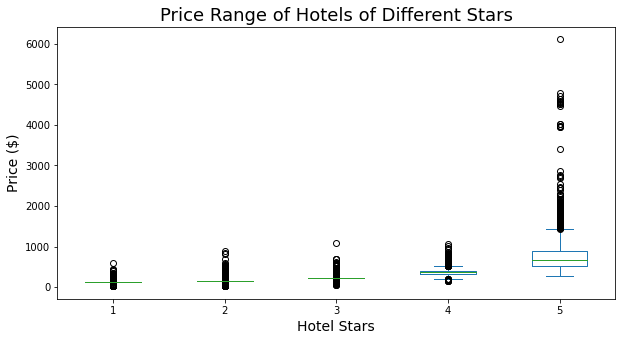

In [ ]:
prices_df.plot(kind="box", figsize=(10, 5))
plt.title("Price Range of Hotels of Different Stars", fontsize=18)
plt.xlabel("Hotel Stars", fontsize=14)
plt.ylabel("Price ($)", fontsize=14)
plt.rc("xtick", labelsize=12)  # fontsize of the tick labels
plt.rc("ytick", labelsize=12)  # fontsize of the tick labels
plt.savefig("price_range_boxplot.png")

Insights
- We can see that the prices increases as the star increases
- 5 star hotels has the highest standard deviation for prices
- 3 star hotels has the lowest standard deviation 

# Find the average ratings of the hotels for different stars hotel

In [ ]:
# Get the stars of hotel for the reviews data by merging
stars_hotel_df = general_df[["hotel_id", "hotel_name", "hotel_stars"]]
df_combine = review_df.merge(stars_hotel_df, on = "hotel_id", how = "left")
df_combine.head(1)

,Id,hotel_id,title,positive_des,negative_des,rating,user_country,type_of_travel,username,date,...,neg_des_cleaned,neg_y,neu_y,pos_y,compound_y,title_cleaned,pos_cat,neg_cat,hotel_name,hotel_stars
0,0,village-at-sentosa,love the place staff and overall the cleanline...,great staff and very clean! great location too,a bit expensive,10.0,Canada,Group,Janica,Aug-22,...,bit expensive,0.0,1.0,0.0,0.0,love place staff overall cleanliness place,"[location, cleanliness, staff]",[value for money],Village Hotel Sentosa by Far East Hospitality,4


In [ ]:
# Splits the data frame into the hotels based on hotelstars and get avgRatingList
avgRatingList = []

for i in range(1, 6):
    df = df_combine[df_combine["hotel_stars"] == i]
    avgRating = round((df.mean()["rating"]), 2)
    avgRatingList.append(avgRating)

avgRatingList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


[6.87, 7.39, 7.26, 7.88, 8.52]

In [ ]:
df_combine = df_combine.drop(df_combine.index[df_combine["hotel_stars"] == 0].tolist())

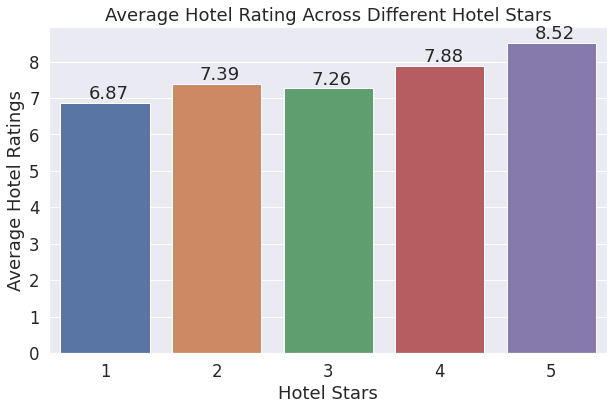

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 6))
# groups by hotelstars and calculates mean avg of rating in each group
avgRating_chart = sns.barplot(x="hotel_stars", y="rating", data=df_combine, ci=None).set(
    title="Average Hotel Rating Across Different Hotel Stars",
    xlabel="Hotel Stars", ylabel="Average Hotel Ratings")
# annotating avg rating values
for i, g in enumerate(avgRatingList):
    plt.text(i - 0.15, g + 0.10, f'{g}')

plt.savefig("avg_hotel_ratings_barchart.png")

###Insights and analysis of the above graph

As the number of stars of a hotel increases, the ratings also increase. However, 2 stars hotels are rated higher than 3 star hotels. So travelers on a budget, may choose to go to 2 star hotel in order to save price

#Average ratings based on different categories (Value for money, location etc) of hotels in different stars

In [ ]:
#reshape dataframe - hotelstars, category
cat_df = pd.melt(general_df[general_df["hotel_stars"] > 0], id_vars = "hotel_stars", value_vars = ["cat_location", "cat_cleaniness", "cat_staff", "cat_comfort", "cat_value_for_money", "cat_facilities"])
cat_df.head(5)

,hotel_stars,variable,value
0,4,cat_location,8.6
1,5,cat_location,8.6
2,5,cat_location,8.5
3,4,cat_location,8.2
4,5,cat_location,8.9


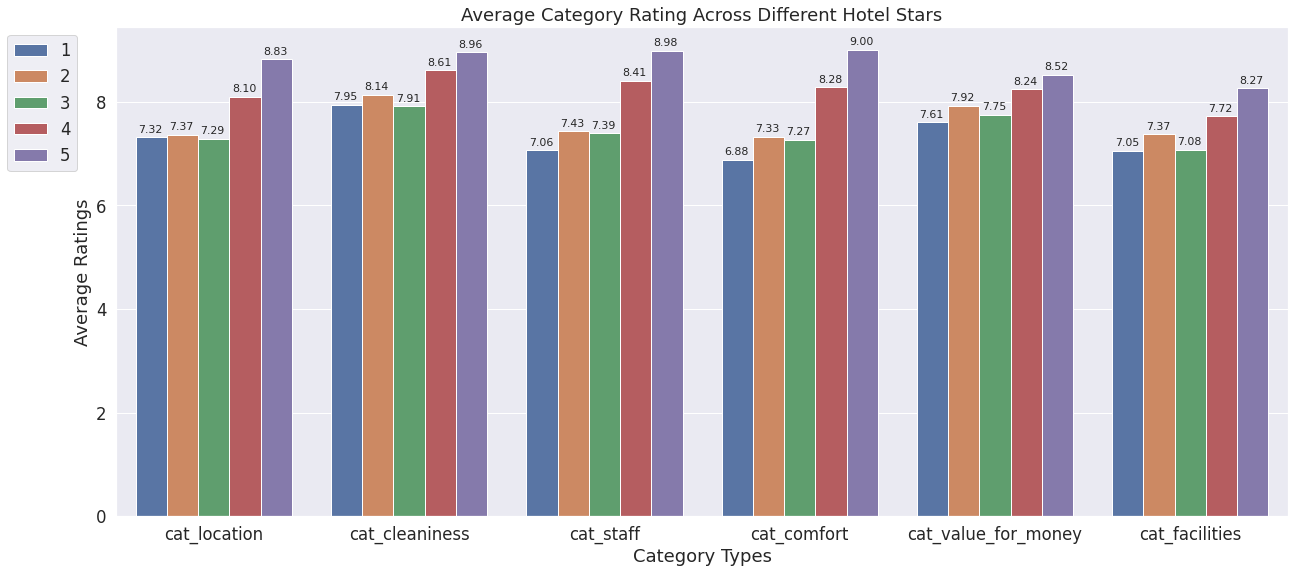

In [ ]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)
plt.figure(figsize=(21, 9))

# groups by hotelstars and calculates mean avg of rating in each group 
catRating_chart = sns.barplot(x="variable", y="value", hue="hotel_stars", data=cat_df, ci=None)

# annotating avg rating values
for bar in catRating_chart.patches:
    catRating_chart.annotate(format(bar.get_height(), '.2f'),
                             (bar.get_x() + bar.get_width() / 2,
                              bar.get_height()), ha='center', va='center',
                             size=11, xytext=(-1, 8),
                             textcoords='offset points')

# adjust legend placement
plt.legend(loc="upper left", bbox_to_anchor=(-0.1, 1.))

plt.title("Average Category Rating Across Different Hotel Stars")
plt.xlabel("Category Types")
plt.ylabel("Average Ratings")

plt.savefig("avg_cat_ratings_barchart.png")

Insights: 


*   General observation that higher the hotel star, higher the rating across all categories (location, cleaniness, staff, comfort, value for money, facilities)
*   2 and 3 star hotel almost the same ratings for certain cats eg. location, comfort - if this category is priority then can go for 2 star hotel instead (cheaper and same lvl of service for this cat)

*   0 star hotel high value for money
- 4 and 5 Stars hotel really stands out in terms of their staff and comfort. As their ratings can be seen to be much higher than 0-3 stars
- Eventhough 5 stars hotel are significantly more expensive, people still think it is value for money

#Percentage of positive and negative reviews of hotels in different stars hotel 



In [ ]:
# Get the positive and negative review count for each star

positive_reviews_df = df_combine[df_combine['pos_des_cleaned'] != "no_pos_des"][
    ['hotel_stars', 'pos_des_cleaned']].groupby('hotel_stars').count()
negative_reviews_df = df_combine[df_combine['neg_des_cleaned'] != "no_neg_des"][
    ['hotel_stars', 'neg_des_cleaned']].groupby('hotel_stars').count()

positive_reviews_df.reset_index(inplace=True)
negative_reviews_df.reset_index(inplace=True)

In [ ]:
# Merge positive review and negative reviews df
merged_pos_neg_df = positive_reviews_df.merge(negative_reviews_df, on="hotel_stars", how="left")

merged_pos_neg_df.head(1)

,hotel_stars,pos_des_cleaned,neg_des_cleaned
0,1,812,718


In [ ]:
# Turn count into percentage
merged_pos_neg_df['total_reviews'] = merged_pos_neg_df['pos_des_cleaned'] + merged_pos_neg_df['neg_des_cleaned']
merged_pos_neg_df['pos_percentage'] = merged_pos_neg_df['pos_des_cleaned'] / merged_pos_neg_df['total_reviews'] * 100
merged_pos_neg_df['neg_percentage'] = merged_pos_neg_df['neg_des_cleaned'] / merged_pos_neg_df['total_reviews'] * 100

merged_pos_neg_df = merged_pos_neg_df[['pos_percentage', 'neg_percentage']]
merged_pos_neg_df.head()

,pos_percentage,neg_percentage
0,53.071895,46.928105
1,54.254131,45.745869
2,52.739967,47.260033
3,54.898964,45.101036
4,57.235931,42.764069


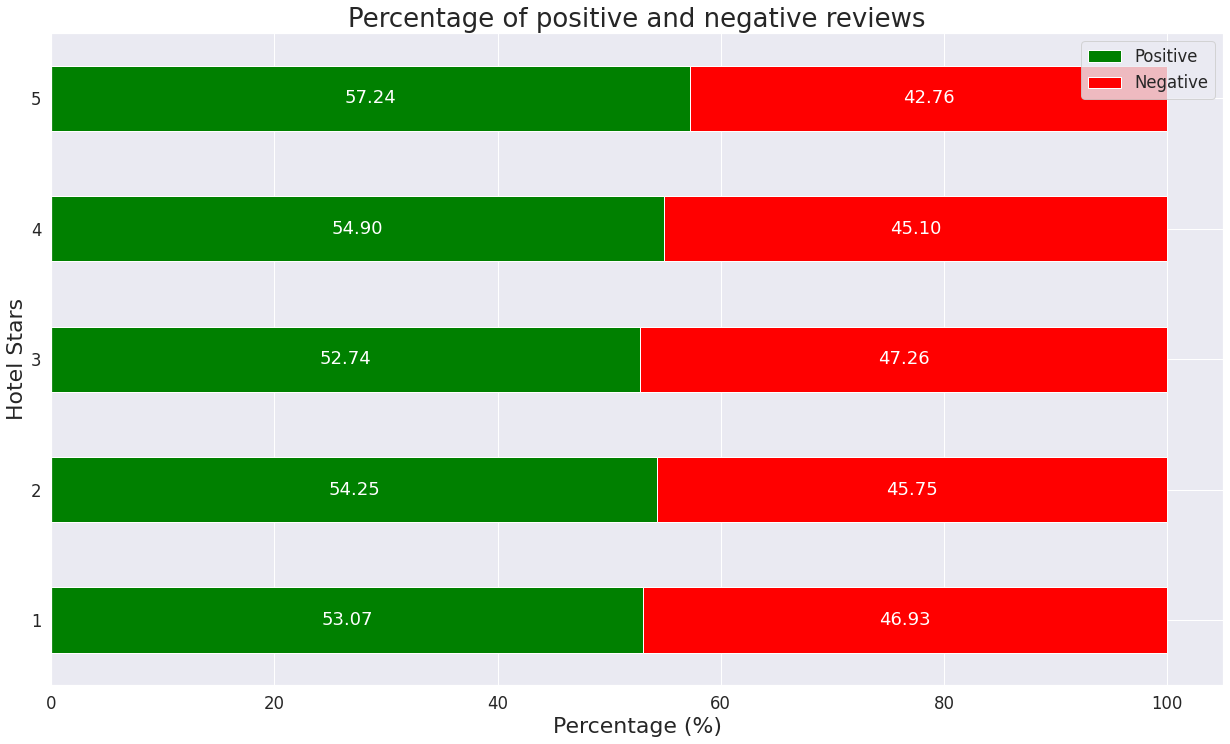

In [ ]:
ax = merged_pos_neg_df.plot(
    figsize=(21, 12),
    kind="barh",
    stacked=True,
    mark_right=True,
    color={"pos_percentage": "green", "neg_percentage": "red"}
)

plt.yticks([0, 1, 2, 3, 4], [1, 2, 3, 4, 5])
plt.title("Percentage of positive and negative reviews", fontsize=26)
plt.xlabel("Percentage (%)", fontsize=22)
plt.ylabel("Hotel Stars", fontsize=22)
plt.rc("xtick", labelsize=20)  # fontsize of the tick labels
plt.rc("ytick", labelsize=20)  # fontsize of the tick labels
plt.legend(["Positive", "Negative"], loc="upper right")

# Shows the values in the bars
list_values = (merged_pos_neg_df["pos_percentage"].tolist()
               + merged_pos_neg_df["neg_percentage"].tolist())
for rect, value in zip(ax.patches, list_values):
    h = rect.get_height() / 2.
    w = rect.get_width() / 2.
    x, y = rect.get_xy()
    ax.text(x + w, y + h, "{:.2f}".format(value), horizontalalignment="center", verticalalignment="center",
            color="white")

plt.savefig("neg_pos_percentages.png")

Insights
- We can see the percentage of positive review has been increasing as go up the stars
- Star 2 performs better than star 3

#Different type of categories of review for each star for positive reviews (Pie chart)

In [ ]:
# Generates a pie chart with the parameters of the hotel dataframe,
# chart title, labels and file name to save the chart as
def generate_pie_chart(sizes, chart_title, labels, file_name):
    #  Gets the values for each label

    explode = []
    for i in sizes:
        if i == max(sizes):
            explode.append(0.1)
        else:
            explode.append(0)

    print(sizes)
    # plots the pie chart
    plt.pie(sizes, autopct=lambda p: "{:.1f}%".format(round(p)) if p > 0 else "", shadow=True, startangle=90,
            explode=explode, labels=None)
    # Sets the figure size
    plt.rcParams["figure.figsize"] = (14, 14)
    # Sets the title
    plt.title(chart_title, fontsize=24)
    # Ensures the chart is circular
    plt.axis("equal")
    # Sets the lengend on the upper left part of the plot
    plt.legend(labels, loc="upper left", bbox_to_anchor=(-0.1, 1.), fontsize=14, title="Categories:")

    # saves the chart as a file
    plt.savefig(file_name)

In [ ]:
# Create a new df where review postive categories are split into mulitple rows if more than 1 category
category_df_exploded = df_combine.explode('pos_cat')
category_df_exploded.head(1)

,Id,hotel_id,title,positive_des,negative_des,rating,user_country,type_of_travel,username,date,...,neg_des_cleaned,neg_y,neu_y,pos_y,compound_y,title_cleaned,pos_cat,neg_cat,hotel_name,hotel_stars
0,0,village-at-sentosa,love the place staff and overall the cleanline...,great staff and very clean! great location too,a bit expensive,10.0,Canada,Group,Janica,Aug-22,...,bit expensive,0.0,1.0,0.0,0.0,love place staff overall cleanliness place,location,[value for money],Village Hotel Sentosa by Far East Hospitality,4


In [ ]:
# All the sizes of the pie chart
sizes_all = []

for i in range(1, 6):
    # Filter the df to remove no reviews rows
    df = category_df_exploded[
        (category_df_exploded['hotel_stars'] == i) & (category_df_exploded['pos_des_cleaned'] != "no_pos_des")][
        ['positive_des', 'pos_cat']]
    df = df.groupby('pos_cat').count()
    df.reset_index(inplace=True)
    df.drop([0, 0], inplace=True)
    sizes = list(df['positive_des'])
    sizes_all.append(sizes)

In [ ]:
pie_labels = ['cleanliness', 'comfort', 'facilities', 'location', 'staff', 'value for money']

[191, 191, 117, 409, 300, 95]


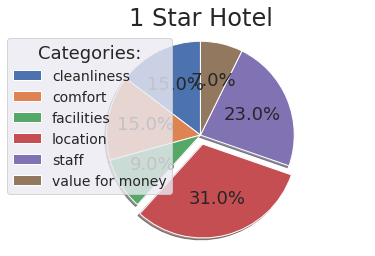

In [ ]:
generate_pie_chart(sizes_all[0], f"{1} Star Hotel", pie_labels, "1_star_review_cat.png")

[1352, 1064, 876, 2568, 1636, 602]


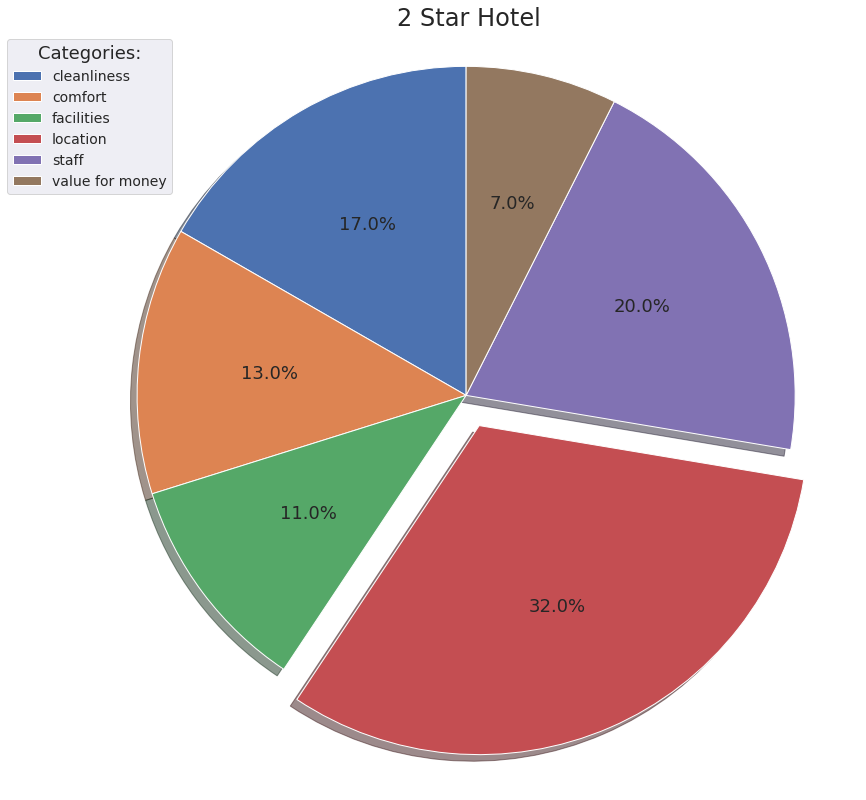

In [ ]:
generate_pie_chart(sizes_all[1], f"{2} Star Hotel", pie_labels, "2_star_review_cat.png")

[1989, 1857, 1775, 4720, 2571, 771]


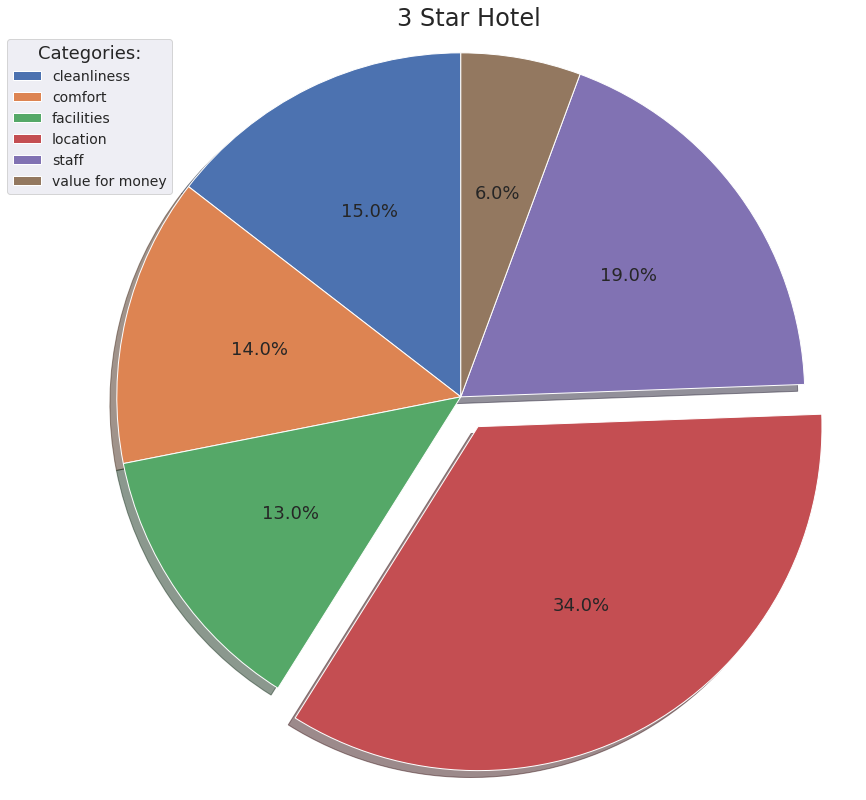

In [ ]:
generate_pie_chart(sizes_all[2], f"{3} Star Hotel", pie_labels, "3_star_review_cat.png")

[5800, 5670, 7759, 16547, 9599, 1842]


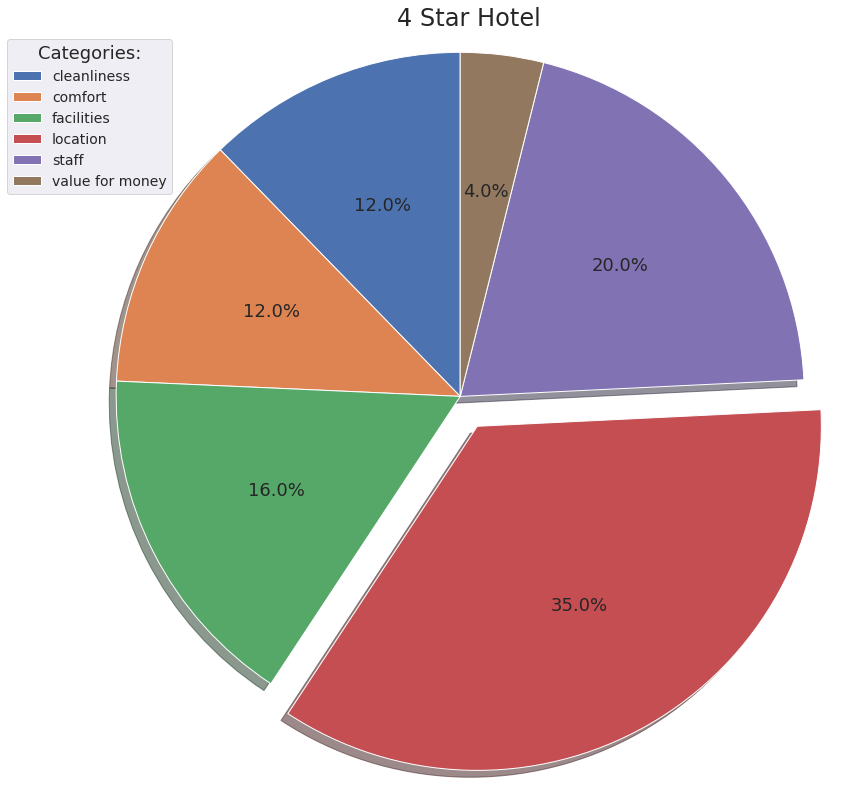

In [ ]:
generate_pie_chart(sizes_all[3], f"{4} Star Hotel", pie_labels, "4_star_review_cat.png")

[3572, 3703, 7012, 10656, 8975, 895]


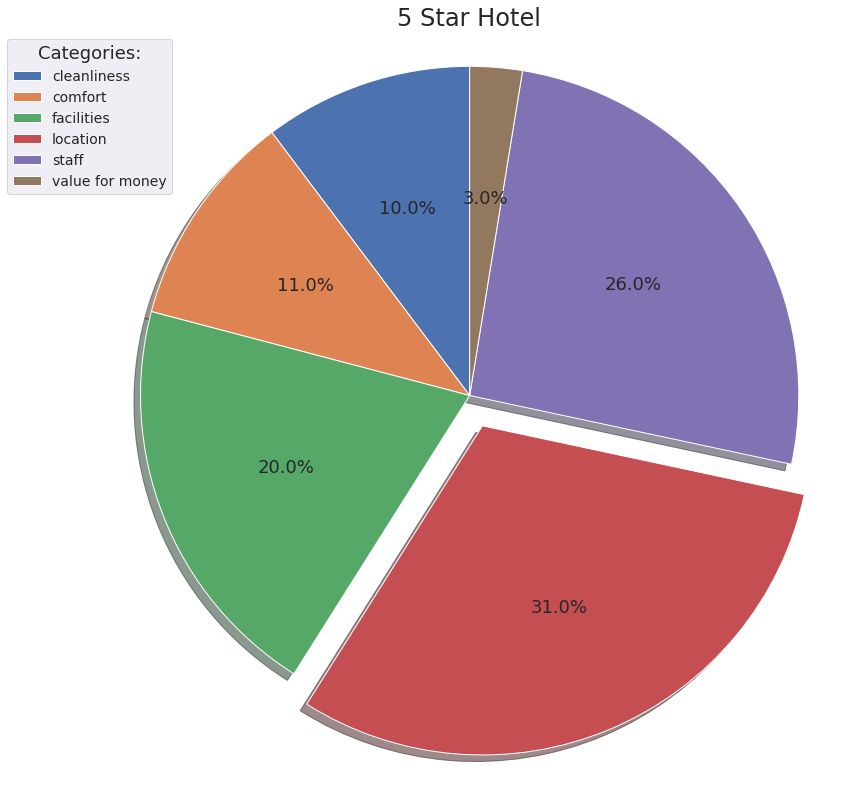

In [ ]:
generate_pie_chart(sizes_all[4], f"{5} Star Hotel", pie_labels, "5_star_review_cat.png")

Insights
- Can see that the percentage of value for money positive reviews decreases as stars increased
- The staff and facilities percentage reviews for 5 star is much higher than other stars

#Number of reviews of hotels in different stars across the years

In [ ]:
# Change date to datetime object
df_combine["date"] = pd.to_datetime(df_combine["date"], format="%b-%y")
df_combine["date"] = df_combine["date"].dt.strftime("%Y-%m")

0         2022-08
1         2022-09
2         2022-10
3         2022-09
4         2022-10
           ...   
174570    2020-05
174571    2021-06
174572    2021-04
174573    2022-09
174574    2022-08
Name: date, Length: 174072, dtype: object

In [ ]:
# Drops Sep and Oct 2022 from the DataFrame
df_combine = df_combine.drop(
    df_combine.index[(df_combine["date"] == "2022-09") + (df_combine["date"] == "2022-10")].tolist())

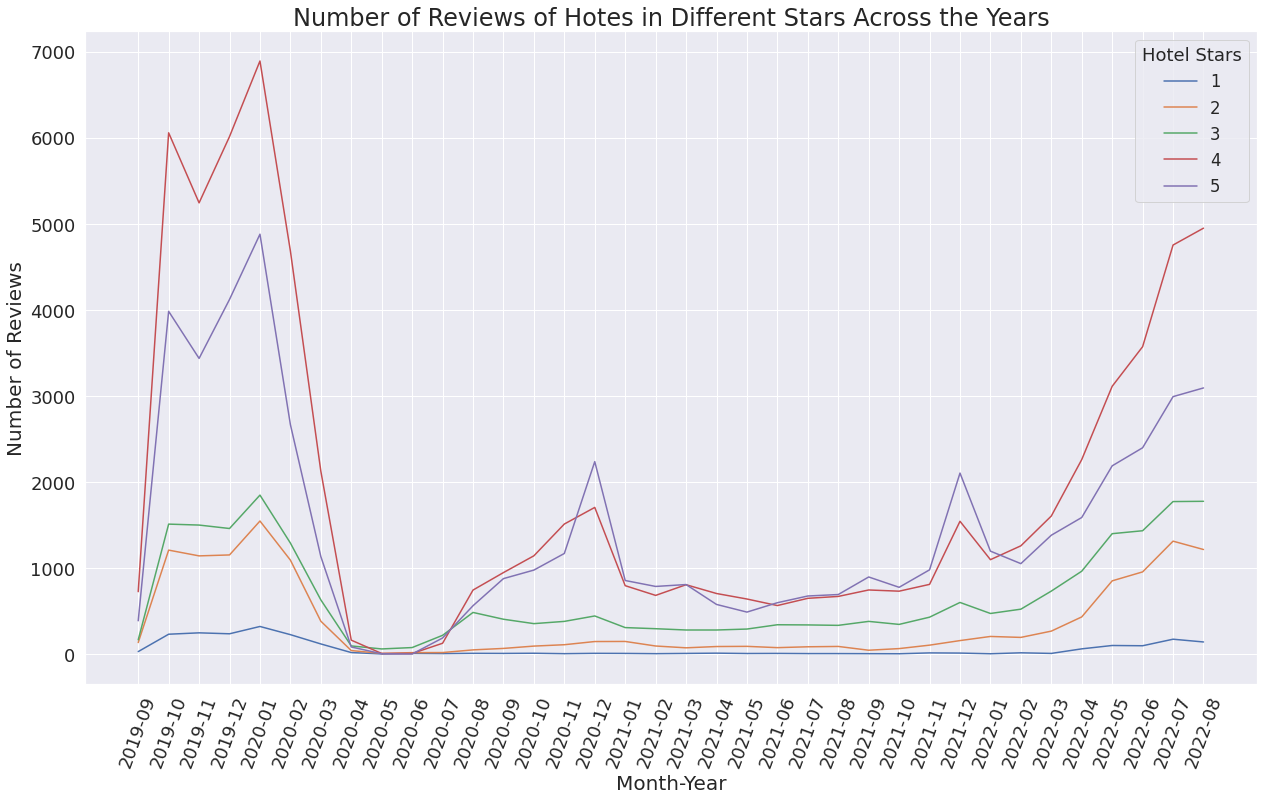

In [ ]:
reviews_over_the_years = df_combine[["date", "hotel_stars", "rating"]]
sorted_review_over_the_years = reviews_over_the_years.groupby(['date', 'hotel_stars']).count()
sorted_review_over_the_years.reset_index(inplace=True)

# Format DataFrame to plot chart
sorted_review_over_the_years_pivot = sorted_review_over_the_years.pivot(index="date", columns="hotel_stars",
                                                                        values="rating")
fig = plt.figure(figsize=(21, 12))

plt.plot(sorted_review_over_the_years_pivot)
plt.legend([1, 2, 3, 4, 5], title="Hotel Stars", loc="upper right")
plt.title("Number of Reviews of Hotes in Different Stars Across the Years", fontsize=24)
plt.xlabel("Month-Year", fontsize=20)
plt.ylabel("Number of Reviews", fontsize=20)
plt.xticks(sorted_review_over_the_years_pivot.index, rotation=70)
plt.rc('xtick', labelsize=18)  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # fontsize of the tick labels
plt.savefig("num_reviews_across_years.png")


Insights
- reviews drop alot in 2020 then steady increase till 2021 jan
- dipped a

#Ratings of reviews of the hotels in different stars across the years

In [ ]:
rating_over_the_years = df_combine[['hotel_id', 'rating', 'date', 'hotel_stars']]
rating_over_the_years.head(1)

,hotel_id,rating,date,hotel_stars
0,village-at-sentosa,10.0,2022-08,4


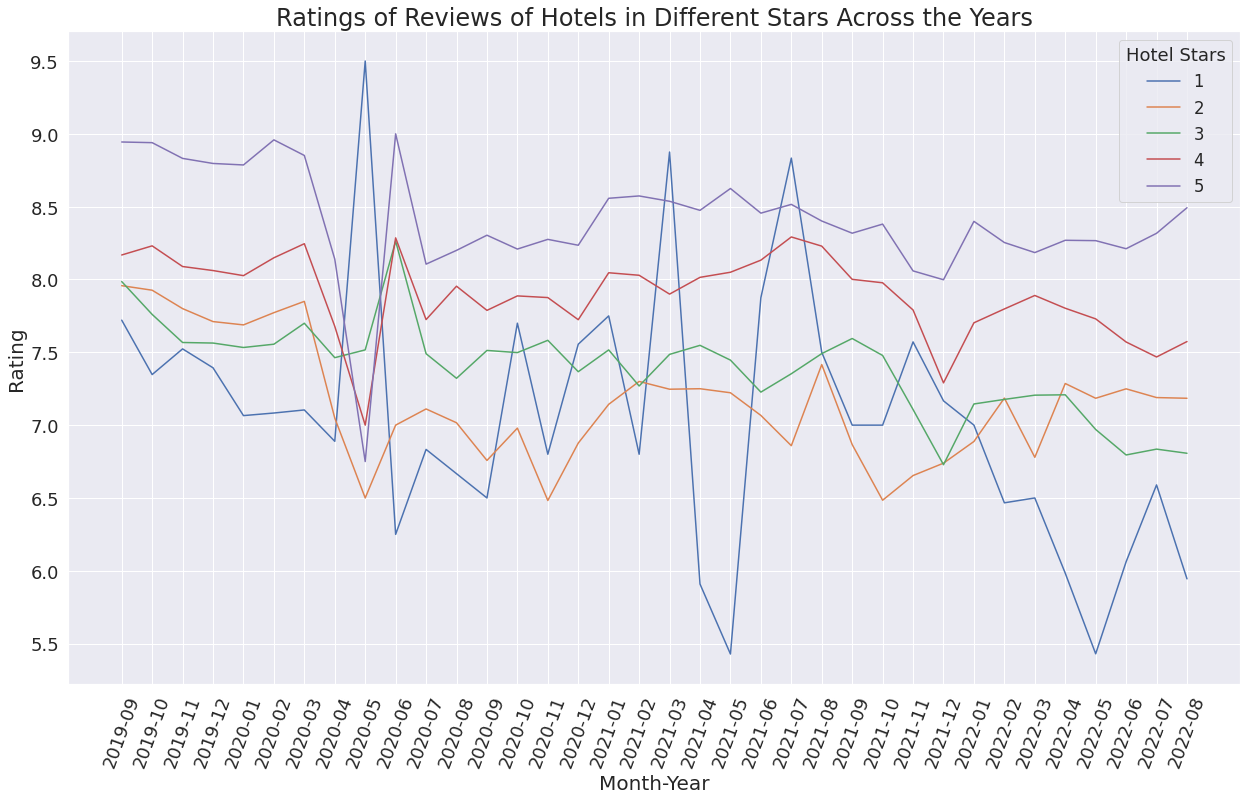

In [ ]:
# Get the ratings over the years
sorted_rating_over_the_years = rating_over_the_years.groupby(['date', 'hotel_stars']).mean()
sorted_rating_over_the_years.reset_index(inplace=True)

# Format chart to plot chart
sorted_rating_over_the_years_pivot = sorted_rating_over_the_years.pivot(index="date", columns="hotel_stars",
                                                                        values="rating")

fig = plt.figure(figsize=(21, 12))

plt.plot(sorted_rating_over_the_years_pivot)
plt.legend([1, 2, 3, 4, 5], title="Hotel Stars", loc="upper right")
plt.title("Ratings of Reviews of Hotels in Different Stars Across the Years", fontsize=24)
plt.xlabel("Month-Year", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.xticks(sorted_review_over_the_years_pivot.index, rotation=70)
plt.rc('xtick', labelsize=18)  # fontsize of the tick labels
plt.rc('ytick', labelsize=18)  # fontsize of the tick labels
plt.savefig("ratings_across_years.png")



Insights
- Steep drop from april to may 2020
- Recovered next month
- Trend is decreasing

#Individual Hotel Analysis
Hotel Chosen are:

1 star hotel w most number of reviews: all-days-inn-checkers-inn, 480 reviews

2 star hotel w most number of reviews: circular-house-singapore, 1388  reviews

3 star hotel w most number of reviews: aerotel-singapore, 2523 reviews

4 star hotel w most number of reviews: boss, 6082 reviews

5 star hotel w most number of reviews: marina-bay-sands, 8048 reviews


##Type of travelers (Solo, Family) and the percentage they make up of for the 5 hotels

In [ ]:
# Get dataframe for each of the hotel chosen

df_cambell = df_combine[df_combine["hotel_id"] == "all-days-inn-checkers-inn"]
df_circular_house = df_combine[df_combine["hotel_id"] == "circular-house-singapore"]
df_aerotel = df_combine[df_combine["hotel_id"] == "aerotel-singapore"]
df_boss = df_combine[df_combine["hotel_id"] == "boss"]
df_marina_bay_sands = df_combine[df_combine["hotel_id"] == "marina-bay-sands"]

In [ ]:
# Labels for the pie charts
pie_labels = ["Solo traveller", "Group", "Couple", "Family"]

In [ ]:
# Generates a pie chart with the parameters of the hotel dataframe,
# chart title, labels and file name to save the chart as
def generate_pie_chart2(df_hotel, chart_title, labels, file_name):
    #  Gets the values for each label
    sizes = []
    for i in labels:
        sizes.append(df_hotel["type_of_travel"][df_hotel["type_of_travel"] == i].count())
    # makes the maximum value pop out
    explode = []
    for i in sizes:
        if i == max(sizes):
            explode.append(0.1)
        else:
            explode.append(0)
    # plots the pie chart
    plt.pie(sizes, autopct=lambda p: "{:.1f}%".format(round(p)) if p > 0 else "", shadow=True, startangle=90,
            explode=explode)
    # Sets the figure size
    plt.rcParams["figure.figsize"] = (10, 8)
    # Sets the title
    plt.title(chart_title)
    # Ensures the chart is circular
    plt.axis("equal")
    # Sets the lengend on the upper left part of the plot
    plt.legend(labels, loc="upper left", bbox_to_anchor=(-0.1, 1.), fontsize=11, title=" Traveller Types:")
    # saves the chart as a file
    plt.savefig(file_name)

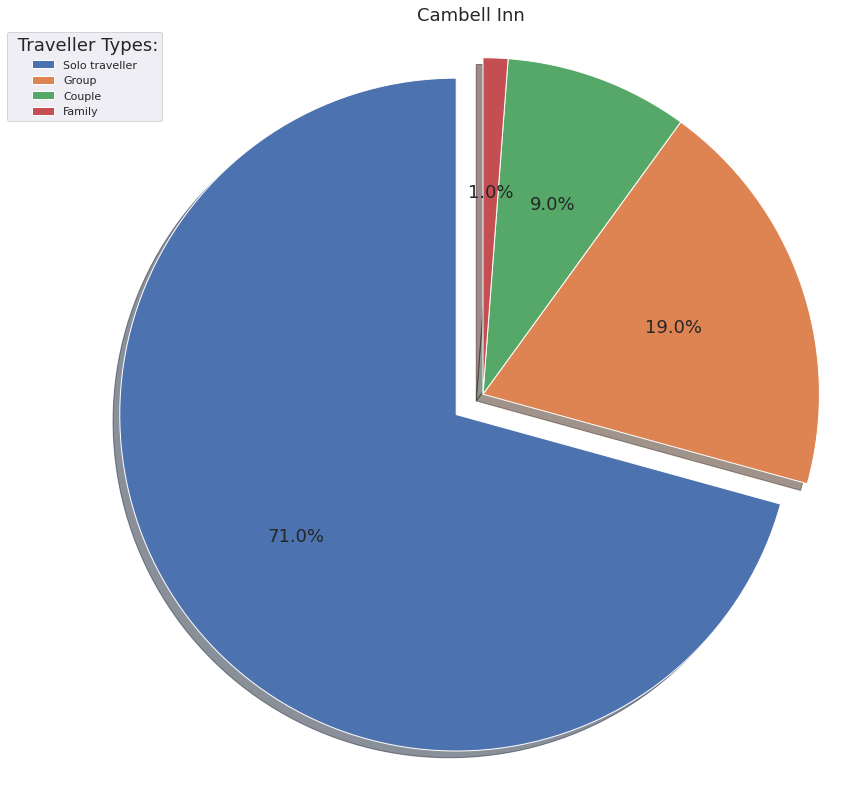

In [ ]:
generate_pie_chart2(df_cambell, "Cambell Inn", pie_labels, "cambell_inn.png")

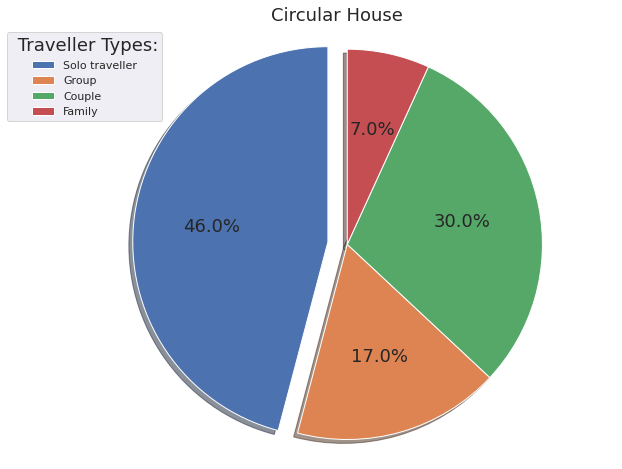

In [ ]:
generate_pie_chart2(df_circular_house, "Circular House", pie_labels, "circular_house.png")

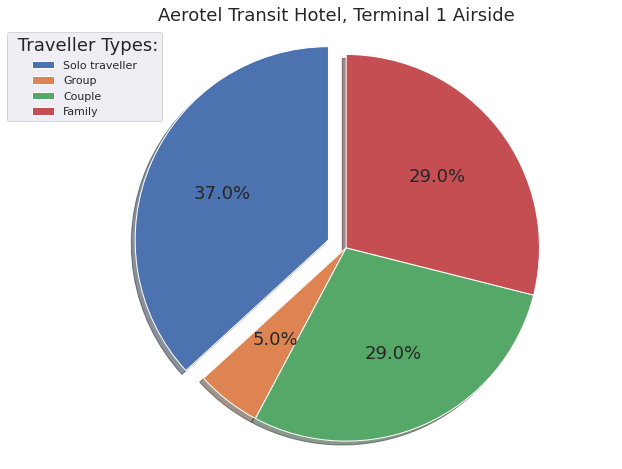

In [ ]:
generate_pie_chart2(df_aerotel, "Aerotel Transit Hotel, Terminal 1 Airside", pie_labels, "aerotel.png")

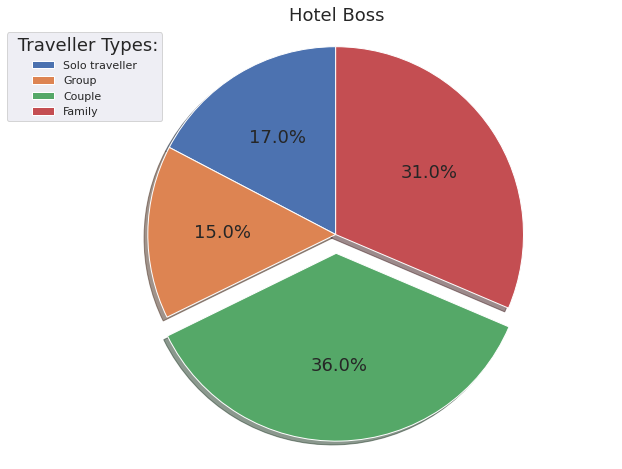

In [ ]:
generate_pie_chart2(df_boss, "Hotel Boss", pie_labels, "hotel_boss.png")

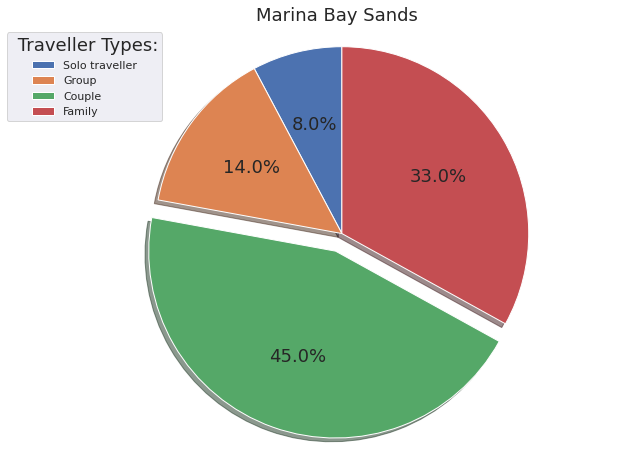

In [ ]:
generate_pie_chart2(df_marina_bay_sands, "Marina Bay Sands", pie_labels, "marina-bay_sands.png")

Insight:
Solo travellers make up the majority of the 1 to 3 star hotels analysed. Couples make up the majority of the 4 and 5 star hotels analysed.

:#Percentage of positive and negative reviews for different review categories

In [ ]:
list_of_df = [
    df_cambell,
    df_circular_house,
    df_aerotel,
    df_boss,
    df_marina_bay_sands

]

name_of_files = [
    "cambell",
    "circular_house",
    "aerotel",
    "boss",
    "marina_bay_sands"
]

titles = [
    "Cambell Inn",
    "Circular House",
    "Aerotel Transit Hotel, Terminal 1 Airside",
    "Hotel Boss",
    "Marina Bay Sands"
]

In [ ]:
review_categories = ["location", "staff", "cleanliness", "comfort", "facilities", "General", "value for money", "no_cat"]

In [ ]:
def reviews_by_categories(df_hotel, chart_title="", file_name=""):
    category_dict = {}

    # Get the count of positive reviews based off of the categories
    for category in review_categories:
        for i in range(len(df_hotel['pos_cat'])):
            cat_list = df_hotel['pos_cat'].iloc[i]
            if category in cat_list:
                if category not in category_dict:
                    category_dict[category] = [1, 0]
                else:
                    category_dict[category][0] += 1

    # Get the count of negative reviews based off of the categories
    for category in review_categories:
        for i in range(len(df_hotel["neg_cat"])):
            cat_list = df_hotel["neg_cat"].iloc[i]
            if category in cat_list:
                category_dict[category][1] += 1

    df = pd.DataFrame(category_dict, index=["Positive", "Negative"])
    df.drop(columns=["no_cat", "General"], inplace=True)
    flipped_df = df.transpose()

    flipped_df.plot(kind='bar', color={"Positive": "green", "Negative": "red"})
    plt.title(chart_title)
    plt.legend(["Positive", "Negative"], loc="upper right", bbox_to_anchor=(-0.1, 1.), fontsize=11,
               title="Type of Reviews: ")
    plt.ylabel("Number of Reviews")
    plt.savefig(file_name)

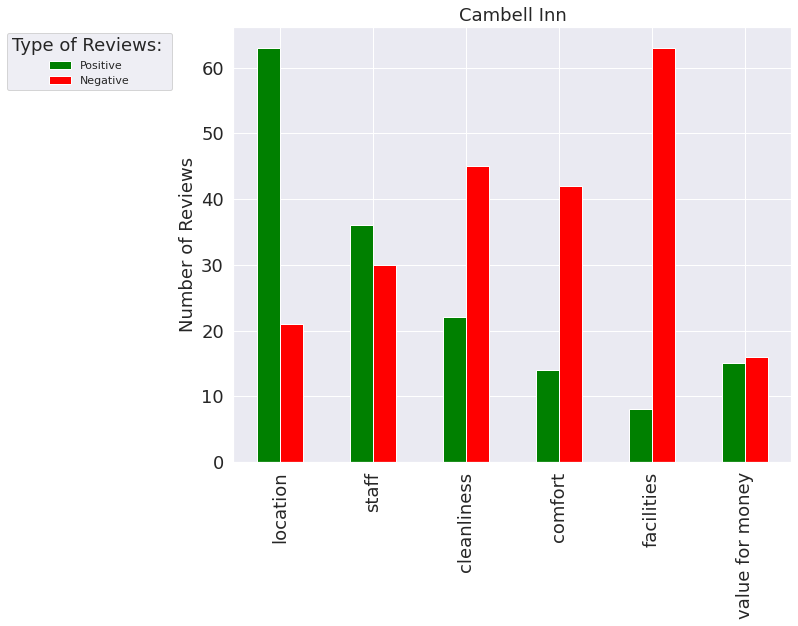

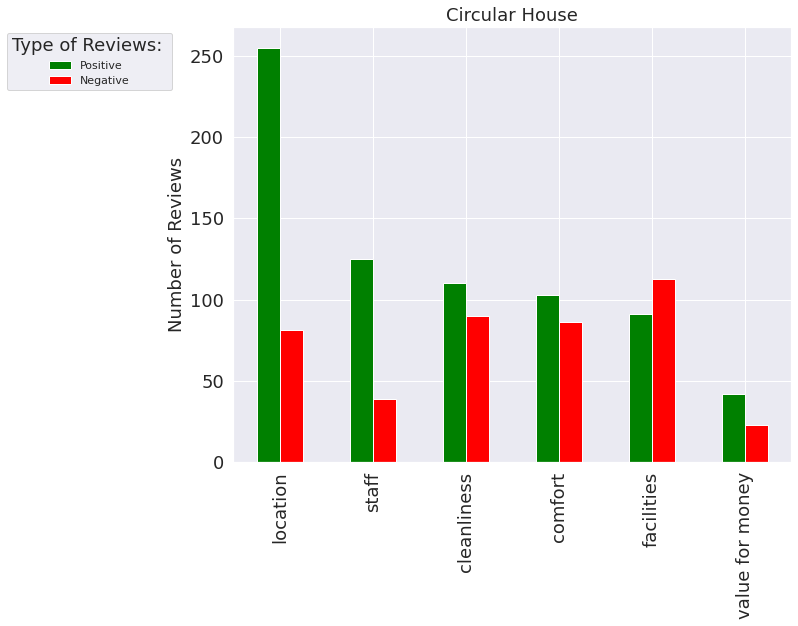

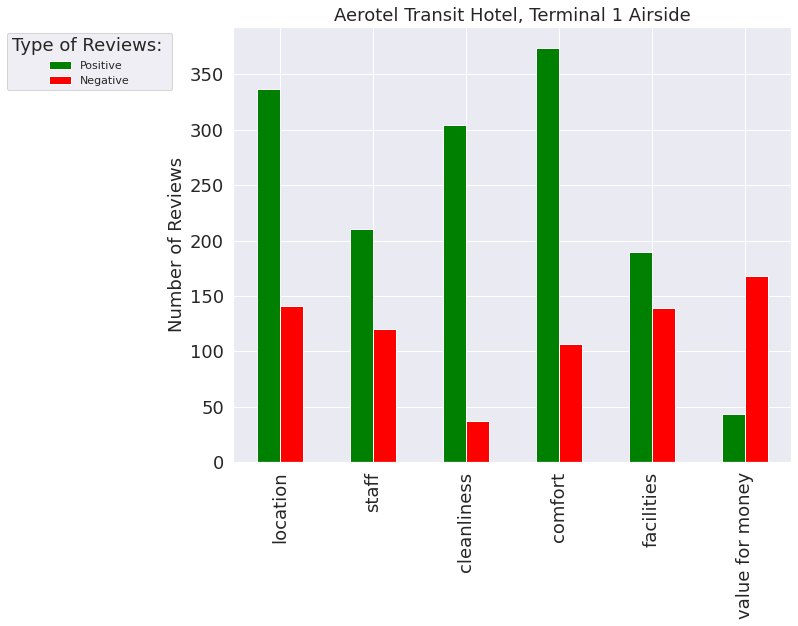

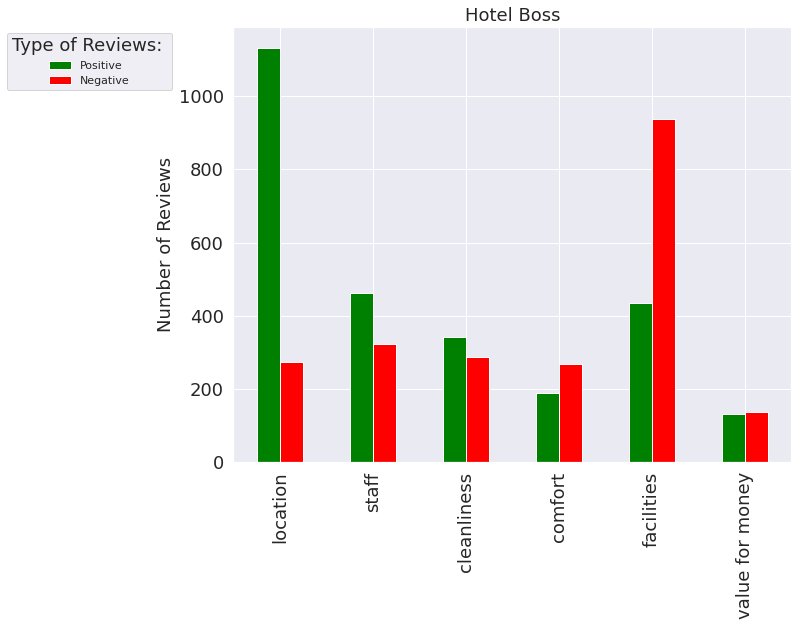

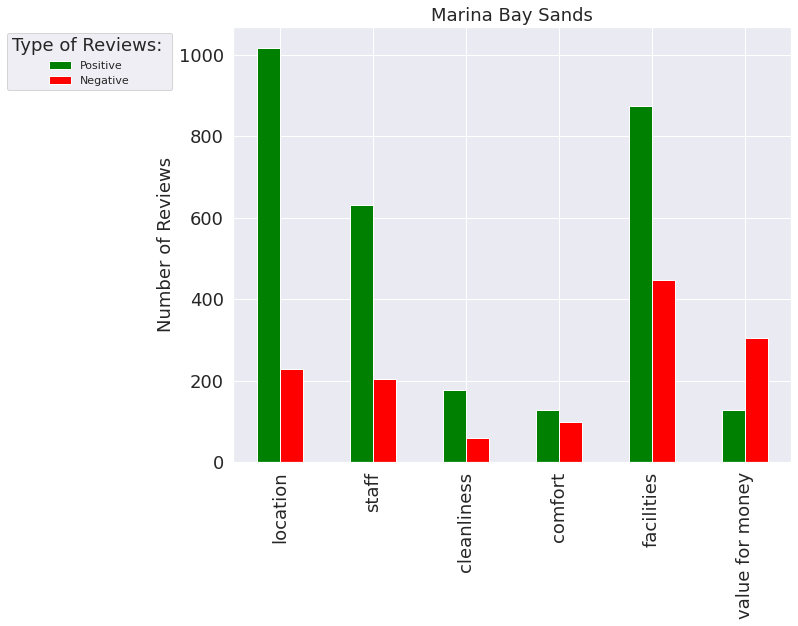

In [ ]:
for index, df in enumerate(list_of_df):
    reviews_by_categories(df, chart_title=f"{titles[index]}", file_name=f"{name_of_files[index]}.png")

Insights: 



#Word cloud on positive and negative reviews for each hotel to see what customers are saying about them

In [ ]:
def generate_pos_neg_wordclouds(df_hotel, name):
    # Sets the stopwords
    stopwords_pos = set(STOPWORDS)
    stopwords_neg = set(STOPWORDS)

    # Converts the dataframe to a dict
    hotel_dict = df_hotel.to_dict()
    # Sets the columm and updates the stopwords based on if positive or negative wordclouds are being generated
  
    stopwords_pos.update(["no_pos_des"], ["hotel"])
    stopwords_neg.update(["no_neg_des"], ["hotel"])

    # Puts the words in a string
    text_pos = " ".join(reviews for reviews in hotel_dict.get("pos_des_cleaned").values())
    text_neg = " ".join(reviews for reviews in hotel_dict.get("neg_des_cleaned").values())
    
    # Generates and saves the wordcloud as a file
    wordcloud_pos = WordCloud(stopwords=stopwords_pos, background_color="white").generate(text_pos)
    wordcloud_neg = WordCloud(stopwords=stopwords_neg, background_color="white").generate(text_neg)

    fig, (ax1, ax2) = plt.subplots(2)
    fig.suptitle(f'{name}: Review Wordclouds')
    ax1.imshow(wordcloud_pos)
    ax2.imshow(wordcloud_neg)
    
    ax1.title.set_text("Positive Reviews")
    ax2.title.set_text("Negative Reviews")
    
    ax1.axis("off")
    ax2.axis("off")

    fig.savefig(f"{name}_wordcloud.png")

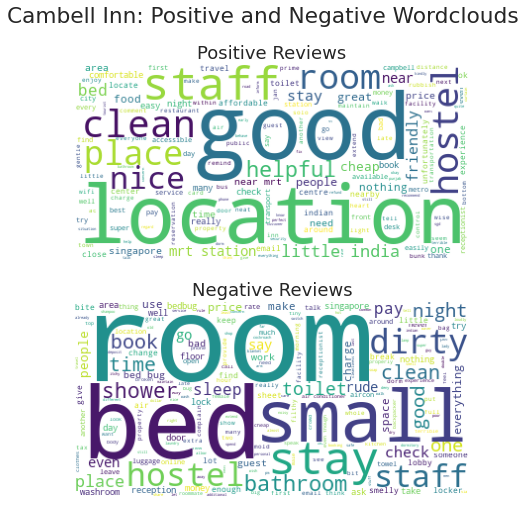

In [ ]:
generate_pos_neg_wordclouds(df_cambell,"Cambell Inn")

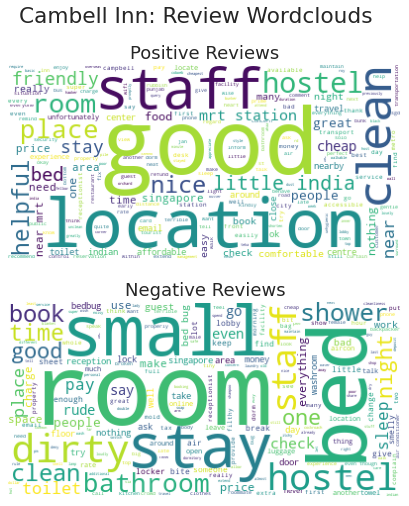

In [ ]:
generate_pos_neg_wordclouds(df_cambell, "Cambell Inn")

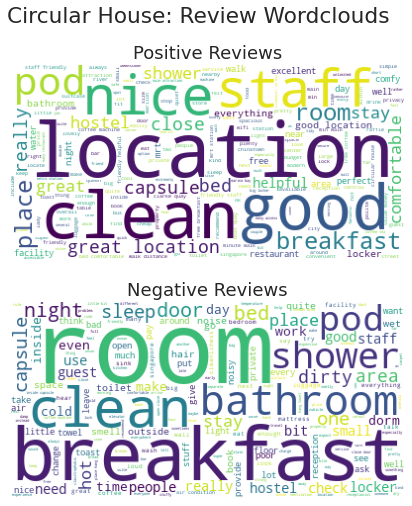

In [ ]:
generate_pos_neg_wordclouds(df_circular_house, "Circular House")

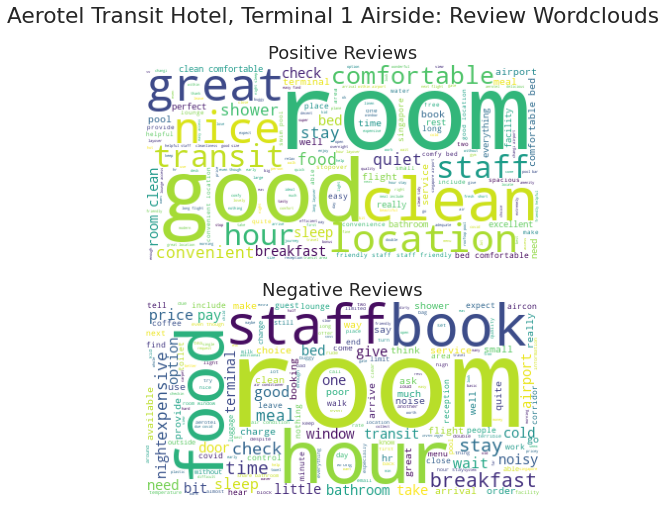

In [ ]:
generate_pos_neg_wordclouds(df_aerotel, "Aerotel Transit Hotel, Terminal 1 Airside")

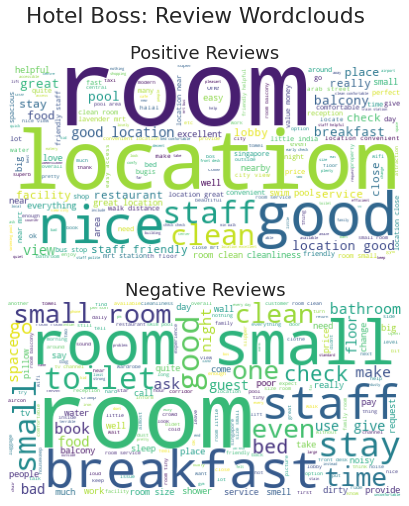

In [ ]:
generate_pos_neg_wordclouds(df_boss, "Hotel Boss")

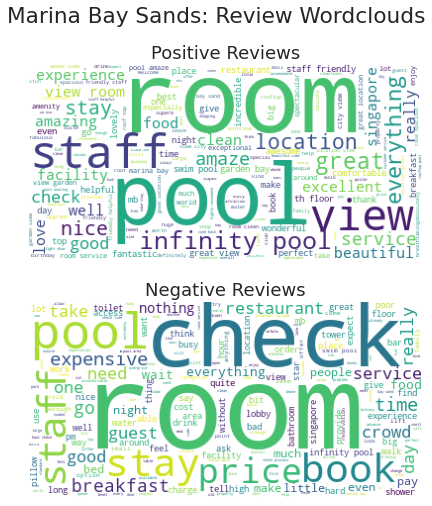

In [ ]:
generate_pos_neg_wordclouds(df_marina_bay_sands, "Marina Bay Sands")

Insights: